Copyright 2022 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.

# Transforming data with `dplyr` & friends

Data often needs to be transformed prior to analysis.
These transformations can be aligned with tasks like data cleaning (e.g. removing invalid data), subsetting (e.g. grouping data for further transformations or analysis), or creating composite variables (e.g. a total score from subscores).
However, behind these tasks are a common set of operations which, when mastered, can be composed to solve most data transformation problems. 

`dplyr` is a popular software library for transforming data in *R* that will be used in this notebook.
If you are somewhat familiar with *R*, `dplyr` might seem strange, because it uses a [special syntax](https://dplyr.tidyverse.org/articles/programming.html) built on top of *R*.
If you are new to *R*, you will likely find the `dplyr` approach more natural and fluent than the standard *R* approach.
In fact, this is the reason that `dplyr` and related software packages (called the `tidyverse`) were created: to simplify working in *R* by standardizing the workflow.

This notebook assumes that you don't know *R* well enough to teach yourself `dplyr` from its [documentation](https://dplyr.tidyverse.org/index.html) but that you are familiar with statistical analysis using other software packages (e.g. SPSS or SAS).
To use this notebook effectively, you should use the [Blockly extension](https://github.com/aolney/jupyterlab-blockly-r-extension) we have developed.
With this extension, you will be able to write *R* code by connecting blocks together.
It is recommended that you watch this [short video tutorial](https://youtu.be/ovCJln08mG8?vq=hd720) or this [long video tutorial](https://youtu.be/-luPzplPDI0?vq=hd720) to see a demonstration, especially if you have never used a Jupyter notebook before.

Ready? Let's get started!

## What you will learn

In the sections that follow you will learn how to transform data with `dplyr`. 
We will cover the following:

- Loading data
- The pipe: `%>%`
- Column operations
    - `select`
    - `mutate`/`transmute`
    - `rename`
- Row operations
    - `filter`
    - `arrange`
- Aggregation
    - `group_by`/`ungroup`
    - `summarize`
- Combining tables
    - `bind_cols`/`bind_rows`
    - `left_join`/`inner_join`/`full_join`
- Application to plotting

Not all of `dplyr` is covered here, but we will cover enough for most tasks. 
In the future, you can use this [cheat sheet](https://raw.githubusercontent.com/rstudio/cheatsheets/main/data-transformation.pdf) for reference.

## When to use `dplyr`

`dplyr` is useful right after loading your data for any cleaning/transformation that will be used across your analyses.
Additionally, if you need to do a quick transformation for a particular purpose (like subsetting data for a plot), `dplyr` can be used for that too. 

## Loading data

First, let's read a CSV file into a dataframe.
A **dataframe** is variable that represents rows, columns, header, etc just like they are stored in a tabular data file.
To do that, we need to import a library called `readr`.
**If it isn't already open**, open up the Blockly extension by clicking on the painter's palette icon, then clicking on `Blockly R`.

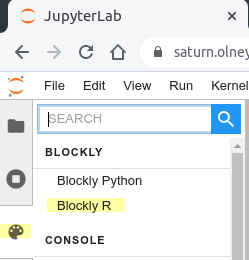

Using the IMPORT menu in the Blockly palette, click on an import block `library some library`:

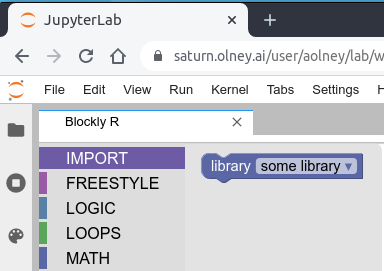

When you click on the block, it drops onto the Blockly workspace.
Click on the `some library` dropdown, choose `Rename variable...`, and type `readr` into the box that pops up.
This imports the *R* `readr` library and gives it the variable name, or alias, `readr`.

In the future, we will abbreviate these steps as:

- `library readr`

Make sure the code cell below is selected (has a blue bar next to it) and press the `Blocks to Code` button below the Blockly workspace.
This will insert the code corresponding to the blocks into the **active cell** in Jupyter, which is the cell that has a blue bar next to it.

Once the code appears in the Jupyter cell below, you must **execute** or **run** it by either pressing the &#9658; button at the top of the window or by pressing Shift + Enter on your keyboard.

We can now do things with `readr`, like load datasets!

*Note: the first time you use a library, it may take some time to load. You can see that R is working because the status bubble will be filled as shown below. When you load the library in the future, it will load instantly because we cache it.*

<!-- 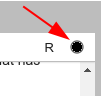 -->
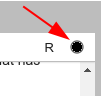

Our file is called `msleep.csv`, and it is in the `datasets` folder.
That means the **path** from this notebook (the one you're reading) to the data is `datasets/msleep.csv`.

To read this file into a dataframe, we will use `readr`. 
Go to the VARIABLES menu in the Blockly palette and click on the `with readr do ...` block.

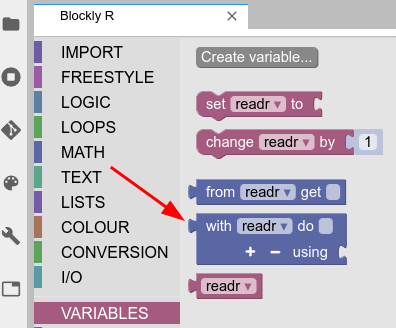

After it drops into the Blockly workspace, wait until the dropdown stops loading (which as mentioned may take a while the first time), and then click on it and select `read_csv`.
You can do this by scrolling the dropdown, or more usefully, typing part of `read_csv` into the field, which will filter the dropdown to matching options, then clicking the option you want:

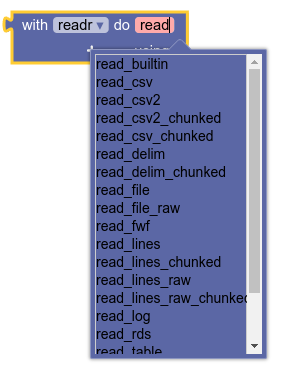

Next get a `" "` block from TEXT, drop it on the workspace, drag it to the `using` part of the first block, and type the file path `datasets/msleep.csv` into it.
Your blocks should look like this:

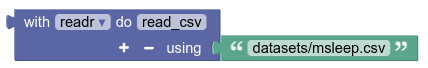

Make sure the cell below is selected (blue bar), then press `Blocks to Code`, and execute the cell to run the code by pressing the &#9658; button.

In the future, we will abbreviate these steps as:

- `with readr do read_csv using "datasets/msleep.csv"`

When you run the cell, it will display the dataframe directly below it.
This is one of the nice things about Jupyter - **it will display the output of the last line of code in a cell**, even if the output is text, a table, or a plot.

<!-- To make it easier to navigate the notebook, execute the code in the cell below by selecting it and pressing the  &#9658; button. 
This will tell Jupyter to only display this many rows when showing us a dataframe. -->

<!-- options(repr.matrix.max.rows=10) -->

The `msleep` data is from the [Harvard PH525x course](https://github.com/genomicsclass/dagdata) and contains measures of sleep across various mammals:

Variable | Description
:--- | :---
name | common name
genus | taxonomic rank
vore | carnivore, omnivore or herbivore?
order | taxonomic rank
conservation | the conservation status of the mammal
sleep\_total | total amount of sleep, in hours
sleep\_rem | rem sleep, in hours
sleep\_cycle | length of sleep cycle, in hours
awake | amount of time spent awake, in hours
brainwt | brain weight in kilograms
bodywt | body weight in kilograms


Right now, we haven't actually stored the dataframe anywhere.
We used `readr` to read the csv file, and then Jupyter output that so we could see it.
But if we wanted to do anything with the dataframe, we'd have to read the file again.

Instead of reading the file every time we want to access the data, we can **store it in a variable**.
In other words, we will create a variable and set it to be the dataframe we loaded from the file.

Using the VARIABLES menu in the Blockly palette, click on `Create variable...` and type `dataframe` into the pop up window.
Then click on the `set dataframe to` block so that your block looks like this:

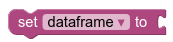

Then go get the same blocks you used before to read the file and connect them to the `set dataframe to` block.
You can do this from scratch or you can use the following procedure:

- With the cell below selected, press `Blocks to Code` to save your intermediate work (the `set dataframe to` block)
- Go back to the previous cell, click on the block you want, and copy it using Ctrl+c
- Click on the cell below to select it, click the Blockly workspace, and paste the block using Ctrl+v

*Tip: If you don't save your intermediate work, you'll lose it because `Notebook Sync` will clear the Blockly workspace when it loads the blocks in the previous cell.*

After you've added the blocks to read the dataframe, drop a variable block for `dataframe` underneath it to display the dataframe (remember, Jupyter will try to display the result of the last line of the cell).

In the future, we will abbreviate these steps as:

- Set `dataframe` to `with readr do read_csv using "datasets/msleep.csv"`
- `dataframe`

As always, you need to hit the &#9658; button or press Shift + Enter to run the code.

You should see the same output as before - the only difference is that we've read the csv and stored the data into the `dataframe` block, so we will use the `dataframe` block whenever we want to work with the data.

## Pipe

Before we proceed with the core `dplyr` operators, we need to explain the pipe, `%>%`.
For reasons that will become clear in a moment, `%>%` is the **glue** between the operators and a key part of the `dplyr` workflow.

So what is the pipe `%>%`?
The best way to explain it is in terms of something you already know, operators like `+`, `-`, or `*`.
Consider two cases:

- When you write a mathematical expression, the operator is in the middle: $3 + 3$
- When you call a function, the name of the function comes first: `read.csv("datasets/msleep.csv")`

Consider what mathematical expressions would look like if operators **were not** in the middle:

$3 * 5 / 4 + 3$

would instead be (renaming operators as functions for clarity)

`add(div(mul(3,5),4),3)`.

Most people would agree that the second option is much harder to read, but this is exactly the way most programming languages work!
One can either apply functions in a nested way like this, or one can create an intermediate variable to hold the output of each operation:

```
result1 = mul(3,5)
result2 = div(result1, 4)
result3 = add(result2, 3)
```

**Pipes were designed to make normal functions more like operators so the code is easier to read and doesn't need intermediate variables.**
We can rewrite the last block of code using pipes as:

```
3 %>% mul 5 %>% div 4 %>% add 3
```

which is very similar to where we started with operators:

$3 * 5 / 4 + 3$

Again, pipes let us rewrite **any** composition of functions this way. 

It is conventional in `dplyr` to end each line with a pipe, so you will more often see code written like this:

```
3 %>% 
    mul 5 %>% 
    div 4 %>% 
    add 3
```

You can think of pipes as a production line, where each person takes the work that was done by the person before them, makes some change, and then passes the work to the next person.
**This intuition is what makes pipes so useful for data transformation workflows.**

Let's do a quick example:

- `library base`
- `library dplyr`
- `library tidyselect`

*Again, these will take a minute to load the first time.*

After `dplyr` loads, the pipe block will be available in SPECIAL. 
The number blocks you need will be in MATH (with default value `123` that you can change by typing into the field).
Feel free to run the cell below each time you add a new stage to the pipeline:

- `pipe 3`
    - to `with base do * using 5`
    - then to `with base do / using 4`
    - then to `with base do + using 3`
    
*Note: to get additional slots, just press the `+` button on the block*

The final result should be `6.75`.

## dplyr

Let's turn to `dplyr` proper. 
We've already loaded the library, so we're ready to go.

The following sections group the `dplyr` operations according to what they operate on:

- Columns, which represent variables
- Rows, which represent datapoints
- Aggregating rows, which represent groups of datapoints
- Tables

In our examples, we won't save the output dataframes, but you could do this in any example by using

- Set `df` to `pipe ...`

### Column operations

The three column operations we'll cover are:

- `select`, for creating a new dataframe with only selected columns
- `mutate` and `transmute`, for creating new columns or transforming existing columns
- `rename`, for renaming a column

#### `select`

Sometimes you are only interested in a few variables and would like to copy them into a new dataframe.
This can be particularly useful if you have a large number of variables and can't display them all at once, or if you want to visually inspect variables side by side that are currently far apart in the dataframe.

`select` has several options for choosing columns:

- by name (exact match)
- by range
- by string match (partial match)
- by exclusion

##### **by name (exact match)**

Suppose in our dataframe we'd like to select the sleep variables `sleep_total`, `sleep_rem`, and `sleep_cycle`.
We can do that by using the name of each variable in a freestyle block (in FREESTYLE):

- `pipe dataframe`
    - to `with dplyr do select` 
        - using freestyle `sleep_total` 
        - and freestyle `sleep_rem` 
        - and freestyle `sleep_cycle`

*Note: remember to use the `+` button to add more slots when you need them. The `-` button removes slots.*

##### **by range**

Another option that is sometimes convenient is to identify the columns by location, counting from the left side of the dataframe.
The first sleep column is #6 and the last sleep column is #8, so we can specify the range, `6:8`

- `pipe dataframe`
    - to `with dplyr do select` 
        - using freestyle `6:8` 

##### **by string match (partial match)**

**An extremely useful way to select is by partial string match.**
In our example, we want all the sleep columns which all begin with "sleep", so we can match on just that:

- `pipe dataframe`
    - to `with dplyr do select` 
        - using `with tidyselect do starts_with` 
            - using `"sleep"` (a string block from TEXT)

*Note: when you do a partial match, you must use a string value like `"sleep"` rather than a partial variable name like `sleep`*

The simplest string match conditions are:

- `starts_with`, for matching the beginning of the variable name
- `ends_with`, for matching the end of the variable name
- `contains`, for matching anywhere inside the variable name

There are also more sophisticated matches:

- `matches`, which lets you define a [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) and select all column names that match
- `num_range`, which lets you define a [prefix followed by a numeric range](https://tidyselect.r-lib.org/reference/starts_with.html), e.g. given variables p0, p1, p2, p3,  `num_range("p", 1:2)` would select only p1 and p2

For more information, [see the reference](https://dplyr.tidyverse.org/reference/select.html).

##### **by exclusion**

The selection methods we've covered so far make sense if the number of columns you want is a small fraction of the total, but what if you just want to exclude a few columns?
The exclusion operator `-` makes this easy, and it may be combined with the other selectors.

This time, let's select all the columns **except** those that begin with `sleep`:

- `pipe dataframe`
    - to `with dplyr do select` 
        - using freestyle `-` `with tidyselect do starts_with` (HINT: see the image below)
            - using `"sleep"` 
            


*Note: remember that you can copy code from a previous cell by clicking on that cell, clicking on the top block you want, using ctrl-c, clicking on the cell you want to paste to, clicking on the workspace, and then using ctrl-v. Just make sure you use Blocks to Code to save any intermediate work before clicking on another code cell.*

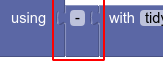

#### `mutate` and `transmute`

We often want to create a new variable, e.g. by log transforming an existing variable or combining multiple variables into a composite score.

`mutate` and `transmute` let us create new variables with one important difference: `mutate` will create new column(s) in addition to the rest, but `transmute` will create new column(s) and drop the rest.

Let's use `mutate` to create a new variable that is the ratio between brain and body weight:

- `pipe dataframe`
    - to `with dplyr do mutate` 
        - using freestyle `brain.body.wt.ratio = brainwt / bodywt`
        
*Note: in R it's OK to use `.` in a variable name*

As you can see, the new column is placed last.
One thing you might notice is that if either of our weight variables is `NA`, the new variable is also `NA`.
That's because in R, `NA` is *contagious* such that any calculation based on a single `NA` is likewise `NA`.

Let's do the same thing with `transmute`, but with an additional twist: we'll create two columns rather than just one, simply by putting a comma between them:

- `pipe dataframe`
    - to `with dplyr do transmute` 
        - using freestyle `brain.body.wt.ratio = brainwt / bodywt, sleep.awake.ratio = sleep_total / awake`

Note that `mutate` will also let you create multiple columns at once this way.
One way to think about `transmute` is as `mutate` followed by `select` on only the new columns, and indeed you could achieve the same result that way (with some extra code).

We've shown simple examples of `mutate` and `transmute` using division, but any function could be used, and there are [built in functions](https://raw.githubusercontent.com/rstudio/cheatsheets/main/data-transformation.pdf) that will offset a variable, do a cumulative calculation (e.g. cumulative sum), or do calculations for ranks, among many others.

#### `rename`

Sometimes we just want to rename a variable. We could do that by using `mutate` and then dropping the old column, or we can use the `rename` function which combines these operations.
Let's rename `brainwt` as `brain_wt` and `bodywt` as `body_wt`:

- `pipe dataframe`
    - to `with dplyr do rename` 
        - using freestyle `brain_wt = brainwt, body_wt = bodywt`
        

Now our variables are more consistently named.

`dplyr` makes data cleaning operations like this so easy that you can avoid using spreadsheet editors and use `dplyr` instead, which has the benefit of documenting all the changes you made to the dataset.

### Row operations

The two row operations we'll cover are:

- `filter`, for keeping only rows that match a condition
- `arrange`, for reordering rows based on a condition

#### `filter`

Sometimes you are only interested in rows that meet a condition and would like to copy them into a new dataframe.
This is often useful when conducting analyses on subsets of data, e.g. data collected before or after a specific date.

`filter` keeps rows were a condition you specify is TRUE.
You can think of `filter` as being the cousin of `select`, but instead of choosing columns, `filter` chooses rows that match a condition.
There are several ways of specifying conditions, including

- comparisons
- joining comparisons with logic
- %in% a list of options

##### **comparisons**

Suppose in our dataframe we'd like to select all the rows where `sleep_total` is greater than 8 hours.
We can do that simply by using the correct R [comparison operator](https://stat.ethz.ch/R-manual/R-devel/library/base/html/Comparison.html):

```
x < y
x > y
x <= y
x >= y
x == y
x != y
```

If you've never programmed before, it's important to remember that `=` and `==` are not the same thing: only `==` means equality, and its opposite is `!=`.

We only need the `>` from the list above for this example:

- `pipe dataframe`
    - to `with dplyr do filter` 
        - using freestyle `sleep_total` > 8

##### **joining comparisons with logic**

Sometimes we are interested in a more complex partition of our data.
The partition might be on a single variable, e.g. `sleep_total` > 8 and < 12, or the partition might involve two variables, e.g. `sleep_total` > 8 and `brainwt` < .02.
To define partitions using multiple conditions, we need to combine conditions with [logical operators](https://stat.ethz.ch/R-manual/R-devel/library/base/html/Logic.html):

```
x & y   (and)
x | y   (or)
```

For example, if we want rows that match `sleep_total` > 8 and `brainwt` < .02, we can do this: 

- `pipe dataframe`
    - to `with dplyr do filter` 
        - using freestyle `sleep_total > 8 & brainwt < .02`

In the same way, we could create arbitrarily complex partitions by combining conditions with as many `&` and `|` as needed.

##### **%in% a list of options**

Suppose we wanted rows where the value on `order` matched `Primates`, `Rodentia`, and `Pilosa`.
We could write that expression using OR, e.g. `order == Primates | order == Rodentia | order == Pilosa`, but we end up writing `order ==` repeatedly.
One way to solve for this is to use the `%in%` operator, which checks for the presence of a value in a vector.
Using our example: 

- `pipe dataframe`
    - to `with dplyr do filter` 
        - using freestyle `order %in% c('Primates','Rodentia','Pilosa')`

This approach is particularly suited to non-numeric values, though it can usefully applied to numeric cases where partitioning would be awkward, e.g. a series of non-consecutive numbers.

#### `arrange`

Especially when you are inspecting data, it can be useful for the data to be sorted in various ways.
This is precisely what `arrange` does.
You can specify multiple columns to sort by, in which case the first column has priority (i.e. sort by X, then by Y, etc), and you can also sort columns descending.

##### **ascending**

Ascending is the default case:

- `pipe dataframe`
    - to `with dplyr do arrange` 
        - using freestyle `sleep_total, brainwt, bodywt`

As shown in the results, the additional columns are only used for breaking ties within earlier columns.

##### **descending**

Sorting descending is a bit different and requires wrapping the column in `desc()`.
Because of this, it is possible to sort on multiple columns with some descending and some ascending:

- `pipe dataframe`
    - to `with dplyr do arrange` 
        - using freestyle `desc(sleep_total), brainwt, bodywt`

### Aggregating rows

Our next major topic in `dplyr` is aggregating rows.
**This is particularly useful when we want to do row/column operations at the subgroup level**.

The aggregation operations we'll cover are:

- `group_by` and `ungroup`, for grouping and ungrouping your data 
- `summarize`, for calculating summaries based on your groups

Along the way, we'll show how operations we've talked about up to this point can also be used with grouped data.


<!--     - Aggregating rows
        - group_by
            - filters and mutates on groups
            - ungroup
        - summarize
            - sd, min, max, median, sum, n, first, last, n_distinct
 -->

#### `group_by` and `ungroup`

One of the things that's hard to understand about `group_by` is that it doesn't have an obvious effect on your data. 
The effect of grouping only happens *after* you apply some other operation.
Let's do an example where we group by `order` and then add the average `sleep_total` for each order, then ungroup:

- `pipe dataframe`
    - to `with dplyr do group_by` 
        - using freestyle `order`
    - then to `with dplyr do mutate`
        - using freestyle `sleep.total.order.avg = mean(sleep_total)`
    - then to `with dplyr do ungroup`

<!-- #### `group_by`

Sometimes you are only interested in rows that meet a condition and would like to copy them into a new dataframe.
This is often useful when conducting analyses on subsets of data, e.g. data collected before or after a specific date.

`filter` keeps rows were a condition you specify is TRUE.
You can think of `filter` as being the cousin of `select`, but instead of choosing columns, `filter` chooses rows that match a condition.
There are several ways of specifying conditions, including

- comparisons
- joining comparisons with logic
- %in% a list of options -->

Look at the last few rows of the result, which are all for `order` `Carnivora`, and note that they have the same value for `sleep.total.order.avg`.
This is because that average was calculated at the group level, and we defined the group by `order`.

Why `ungroup`?
If you leave the data grouped, all operations will apply to the groups you defined until you ungroup.

Groups can be defined very flexibly. 
You can define groups based on multiple columns (e.g. `order, vore, genus`) or even by using functions on the values of a column (e.g. quantiles).

Let's look at another example.
Suppose we want a dataframe with only the minimum `sleep_total` animal for each `order`:

- `pipe dataframe`
    - to `with dplyr do group_by` 
        - using freestyle `order`
    - then to `with dplyr do filter`
        - using freestyle `sleep_total == min(sleep_total)`
    - then to `with dplyr do ungroup`

Because we applied the filter at the group level, and we only returned rows where the filter returned true, the only rows returned were the minimum `sleep_total` row for each group.

#### `summarize` 

Our examples of `group_by` and `ungroup` so far have returned versions of the original dataframe.
However, sometimes you want to create a new dataframe at the group level, one that captures various properties of the groups.
This is what `summarize` is for!

Perhaps the best way to think of `summarize` is as a `mutate` that you apply at the group level.
To see how this works, let's do an example with summary statistics on `sleep_total` using `order` to group:

- `pipe dataframe`
    - to `with dplyr do group_by` 
        - using freestyle `order`
    - then to `with dplyr do summarize`
        - using freestyle `m = mean(sleep_total)` (all the following are freestyle blocks)
        - and `median = median(sleep_total)`
        - and `sd = sd(sleep_total)`
        - and `min = min(sleep_total)`
        - and `max = max(sleep_total)`
        - and `n = n()`
        - and `distinct = n_distinct(sleep_total)`
        
*Note: This example uses summary statistics because they are familiar. If you want summary statistics on groups, you should use an external function [like this](https://stackoverflow.com/a/62902319) instead of writing boilerplate code like this example.*

The functions used in this example are general R functions except `n()` and `n_distinct()`, which are `dplyr` functions.
If your groups are sorted, other `dplyr` functions that might be useful are positional functions like `first` and `last`, which return the first/last element in a vector, again defined at the group level.
Other options are in the [`dplyr` cheatsheet](https://raw.githubusercontent.com/rstudio/cheatsheets/main/data-transformation.pdf).

### Combining tables

The final major `dplyr` topic is combining tables, a common task when data is collected across different studies or different instruments.

We can consider two distinct scenarios when combining tables:

- Combining without an id (`bind_rows` / `bind_cols`)
- Combining with an id (various types of joins)

#### `bind_rows`

Perhaps the simplest scenario is when there are some additional observations to append to the main dataframe.
The observations *must* have the same columns.

To try this out, we first need a new dataframe (Remember you can copy/paste earlier blocks or code):

- Set `df_short` to `with readr do read_csv using "datasets/msleep-join.csv"`
- `df_short`

These two animals are just slight humorous modifications of the original rows for cheetah and owl monkey.

Add these to the original dataframe::

- `pipe dataframe`
    - to `with dplyr do bind_rows` 
        - using `df_short`

Remember you can save `dplyr` operations like this to another variable or overwrite your `dataframe`, but we will not do so here to simplify presentation.

#### `bind_cols`

`bind_cols` strikes me as dangerous and should probably not be used in most cases (you should instead use a join that matches on an id).
The reason is that `bind_cols` adds one or more columns to your dataframe without any checks on whether the correct value is assigned to each row.
Instead, the columns are added according to the current order of your dataframe.

As an example of this and why it's problematic, let's select columns from our dataframe, reorder them, and then use `bind_cols` to put them back into the dataframe:

- `pipe dataframe`
    - to `with dplyr do select` 
        - using freestyle `sleep_total` 
        - and freestyle `sleep_rem` 
    - then to `with dplyr do arrange` 
        - using freestyle `sleep_total` 
    - then to `with dplyr do bind_cols` 
        - using `dataframe`

Nicely, `bind_cols` renamed our duplicate columns, but as you can see by comparing the new columns with their originals, the values don't match thanks to our use of `arrange`.
To ensure correct alignment, you want to use some kind of **join** that matches on an id.

#### `left_join`

All `dplyr` joins match on id, but **joins differ on what they do with rows that don't match**.
**Left joins preserve the # rows of the left (i.e. input) dataframe.**
Any rows that don't match the right dataframe receive NA in the corresponding columns.
To see how this works, let's add two rows of our dataframe to `df_short`, add a new column, and remove everything but that column and `name`:

- Set `df_short` to `pipe dataframe`
    - to `with dplyr do slice` using `1:2`
    - then to `with dplyr do bind_rows` 
        - using `df_short`
    - then to `with dplyr do mutate` 
        - using freestyle `random = runif(4)`
    - then to `with dplyr do select` 
        - using freestyle `name,random`
- `df_short`

As you can see, `df_short` now contains two rows that match the original dataframe on `name`, plus two rows that don't match on `name`, and all rows have a new `random` column.

Let's do a left join using `df_short` as the input and matching on `name`:

-  `pipe df_short`
    - to `with dplyr do left_join` 
        - using `dataframe`
        - and freestyle `by = "name"`

Notice three things about the output:

1. The left (input), `df_short`, is the same (first 2 columns and all 4 rows match `df_short`)
2. The first two rows, which matched on `name` between `df_short` and `dataframe`, are filled with the corresponding values from `dataframe`
3. The last two rows, which **didn't match**, are filled with NA

Watch what happens when we use the same code, but with `dataframe` as the left (input) dataframe (copy your code above and modify):

-  `pipe df_short`
    - to `with dplyr do left_join` 
        - using `dataframe`
        - and freestyle `by = "name"`

This time, because `dataframe` was the left (input), all the rows/colums except the last match `dataframe`.
The last column, `random`, only has values for the first two rows, where there was a match on `name` between the two dataframes, and the rest of `random` is NA.

**Remember that order matters with a left join**, so you need to decide which dataframe has priority and use that one first.

*Note: There is also a right join, which does the opposite of a left join, but you can get the same effect with a left join by swapping which dataframe is input.*

#### `inner_join`

Inner joins are useful when you only want matching rows in the output.
As a result, inner joins do not guarantee that the input dataframe is preserved, and the order of dataframes does not matter.

Check it out:

-  `pipe df_short`
    - to `with dplyr do inner_join` 
        - using `dataframe`
        - and freestyle `by = "name"`

As expected, only the two matching rows are in the output.

#### `full_join`

Full joins return all matching and all non-matching rows of input, filling the corresponding non-matching columns with NA.
This can be useful when you are concerned about accidentally throwing data away.
Let's try it:

-  `pipe df_short`
    - to `with dplyr do full_join` 
        - using `dataframe`
        - and freestyle `by = "name"`

Our non-matching names are in rows 3 and 4, and you can see all values for those rows are NA in the columns to the right of `random`.
Likewise, the values of `random` below these rows are NA.

## Pivoting data with `tidyr`

We can do a variety of data transformations with `dplyr` but one type of transformation, pivotting, requires a different package called `tidyr`.

Pivotting is typically applied when each dataframe row consists of more than one observation.
For example, suppose a row represents a person whose body temperature was measured daily for three days, and these temperatures were stored in different columns:

| Participant | Temp1 | Temp2 | Temp3 |
|-------------|-------|-------|-------|
| 1           | 98.6  | 98.2  | 99.1  |
| 2           | 97.8  | 98.1  | 97.5  |
| 3           | 99.2  | 98.8  | 98.9  |
| 4           | 98.5  | 98.4  | 98.1  |

This **wide** data format is convenient for some analyses but not others, and the semantics of what in each row corresponds to an observation is no longer clear without a data dictionary.

An alternative format, sometimes referred to as **long format** or [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html), specifies that each row is a single observation.
The table in tidy format might look like this:

| Participant | Measurement | Value |
|-------------|-------------|-------|
|           1 |       Temp1 |  98.6 |
|           1 |       Temp2 |  98.2 |
|           1 |       Temp3 |  99.1 |
|           2 |       Temp1 |  97.8 |
|           2 |       Temp2 |  98.1 |
|           2 |       Temp3 |  97.5 |
|           3 |       Temp1 |  99.2 |
|           3 |       Temp2 |  98.8 |
|           3 |       Temp3 |  98.9 |
|           4 |       Temp1 |  98.5 |
|           4 |       Temp2 |  98.4 |
|           4 |       Temp3 |  98.1 |

The advantage of long format (besides cleaner semantics) is that a variety of analysis and modeling packages in R require this format!

Let's work through this example. 
First, we need to load `tidyr`:

- `library tidyr`

Next we need to read the wide data and pivot it.
Our pivot operation needs to specify the names of the new columns, `Measurement` and `Value`:

- `pipe`
    - with `readr` do `read_csv` using `"datasets/temp.csv"`
    - to with `tidyr` do `pivot_longer` 
        - using `!Participant`
        - and `names_to="Measurement"`
        - and `values_to="Value"`
        
*Note: `!Participant` specifies which columns should be pivoted.*

Often when data is in long format, one can use `dplyr` to achieve various data transformation goals, but one can also restore the dataframe back to its original format using `pivot_wider`.
Copy the blocks above below and add the following to the end of the pipeline:

- with `tidyr` do `pivot_wider`
    - using `names_from=Measurement`
    - and `values_from=Value`

## Application to plotting using `ggplot2`

As mentioned, if you need to do a quick transformation for a particular purpose (like subsetting data for a plot), `dplyr` can be used for that too. 
JupyterLab will display the plot just like dataframes: as long as the plot is the last value in a cell, JupyterLab will display the plot in the cell output.

Let's look at an example combining `dplyr` and `ggplot`.
While a full introduction to `ggplot` is outside the scope of this notebook, if you are familiar with plotting in other packages, you should recognize most `ggplot` options.

Start by importing `ggplot`:

- `library ggplot2`

Our example is a bar chart with error bars.
We'd like each bar to represent the mean `sleep_total` for each `vore`, and we'd like the error bars to be standard errors.
If you are predicting the use of `group_by` and `summarize`, you're right!
Let's break it down:

- `pipe dataframe`
    - to `with dplyr do group_by` 
        - using freestyle `vore`
    - then to `with dplyr do summarize`
        - using freestyle `mean = mean(sleep_total)` (all the following are freestyle blocks)
        - and `sd = sd(sleep_total)`
        - and `n = n()`
        - and `se = sd / sqrt(n)`
    - then to `make plot` (in SPECIAL) `with ggplot2 do ggplot`
            - using freestyle `aes(x = vore, y = mean, fill = vore)`
        - with `ggplot do geom_col`
        - with `ggplot do geom_errorbar`
            - using `aes(ymin = mean - se, ymax = mean + se)`
        - with `ggplot do labs`
            - using `title = "Mean Sleep Total ± 1 SE"`
        
Everything up to `make plot` we've already covered;
`make plot` is a new block in SPECIAL that is designed for `ggplot`, and it has a similar feel to the pipeline used by `dplyr` except that it connects plot elements together.

A full explanation is out of scope, but the basic idea is to start with a blank plot, add columns, add error bars, and add a title.
This is all done using a special syntax created for `ggplot`.

As you can see, `ggplot` and `dplyr` are very complementary, and when you become proficient you will often find yourself doing data transformations like this just to make a particular plot.

<!--  -->